<a href="https://colab.research.google.com/github/vignan8279/Deep_learning_fastai/blob/master/fast_ai_practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
folder = 'black'
file = 'black.txt'

In [0]:
folder = 'teddys'
file = 'teddies.txt'

In [0]:
folder = 'grizzly'
file = 'grizzly.txt'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('data/bears/teddys'),
 PosixPath('data/bears/teddies.txt'),
 PosixPath('data/bears/grizzly.txt'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/.ipynb_checkpoints'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/black.txt')]

In [0]:
classes = ['teddys','grizzly','black']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


grizzly


black


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['black', 'grizzly', 'teddys']

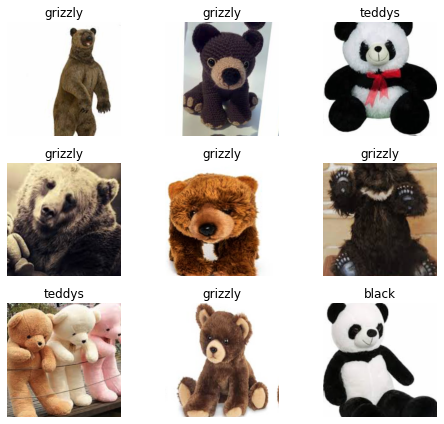

In [0]:
data.show_batch(rows = 3, figsize=(7, 6))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 480, 120)

In [0]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.119542,1.004933,0.208333,00:04
1,0.138354,1.363719,0.283333,00:04
2,0.154891,1.468566,0.283333,00:04
3,0.156741,1.335299,0.250000,00:04


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


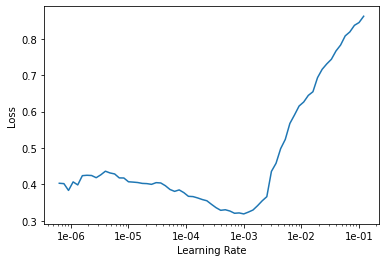

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr= slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.125831,0.929182,0.183333,00:05
1,0.097408,0.953639,0.191667,00:04


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (480 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,teddys,teddys,teddys,teddys
Path: data/bears;

Valid: LabelList (120 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,black,black,teddys,teddys
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

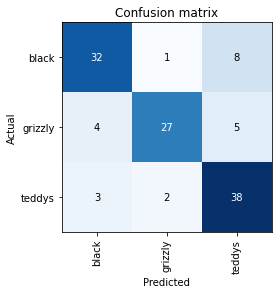

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

losses, idxs = interp.top_losses()
top_loss_path = data.valid_ds.x[idxs]
top_loss_path

ImageList (120 items)
Image (3, 228, 221),Image (3, 225, 225),Image (3, 261, 193),Image (3, 225, 225),Image (3, 225, 225)
Path: data/bears

In [0]:
fd = ImageCleaner(file_paths = top_loss_path)   #Doesn't work in colab

In [0]:
data.classes

['black', 'grizzly', 'teddys']

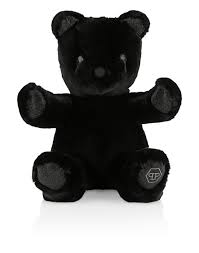

In [0]:
img = open_image(path/'black'/'00000031.jpg')
img

In [0]:
classes = ['black', 'grizzly', 'teddys']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size = 224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

In [0]:
pre_class . pred_idx, outputs = learn.predict(img)
pre_class